In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df =pd.read_csv(r'D:\python for data sinceand ml\data scince project\fake_news_dataseat\Data\news.csv')

In [12]:
print(df.head(10))

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Ka

In [13]:
print(df['text'].head())

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object


In [14]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [15]:
labels=df.label
labels.count()

6335

In [16]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [17]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [18]:
df.loc[1].label

'FAKE'

In [19]:
doc = nlp(df.loc[1].text) 

In [20]:
for ent in doc.ents:
  print(ent.text,'|',ent.label)

Google | 383
two | 397
Paul Ryan | 380
Paul Ryan | 380
Today | 391
Paul Ryan | 380
the Trump Train | 383
a few weeks ago | 391
Trump | 383
Trump | 383
Ryan | 380
the United States | 384
the Republican Party | 383
a chilly afternoon | 392
Wisconsin | 384
@SpeakerRyan | 380
Republicans | 381
ABC News Politics (@ABCPolitics | 383
November 5, 2016 | 391
The Democratic Party | 383
Ryan | 380
zero | 397
Trump | 380
Ryan | 380
2020 | 391
DNC | 383
Election Day | 391
Ryan | 380
Trump | 383
Paul Ryan | 380
Ryan | 380
months | 391
House | 383
Trump | 380
Trump | 383
2016 | 391
2016 | 391
Republicans | 381


In [21]:
from spacy import displacy

displacy.render(doc,style='ent')

In [22]:

df['label'] = df['label'].apply(lambda x:1 if x == 'FAKE' else 0)



In [23]:
df.head()

#?  1 = fake
#   0 = real

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [24]:
import nltk
from nltk.corpus import stopwords
def preprocess(text):
  doc = nlp(text)
  
  no_stop_words = [
    
    token.text for token in doc if not token.is_stop and not token.is_punct ]
  return ' '.join(no_stop_words)

preprocess('Hi, my name..... is Amr... Khaled!. I am 19 years old. I am learning programming, specifically data science. I live in a village in Egypt, and I study computer science.')


'Hi Amr Khaled 19 years old learning programming specifically data science live village Egypt study computer science'

In [ ]:
df['contents'] =df['title'] + " " + df['text']
df['contents'] = df['contents'].apply(preprocess)

## Train test split 

In [26]:
from sklearn.model_selection import train_test_split

x = df['contents']
y = df.label

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [27]:
print(type(x_train))
print(x_train[:5])


<class 'pandas.core.series.Series'>
842     Clinton braces for Nevada nail-biter The elect...
4650    U.S. District Judge orders homophobic Kentucky...
622     The First Space Photo Of Earth - Shot From A T...
4573    Worth a shot: Former Pennsylvania police offic...
2653    Comment on Morning Joe Destroys Corrupt Clinto...
Name: contents, dtype: object


In [28]:
x_train.shape

(4434,)

In [29]:
from sklearn .feature_extraction .text import CountVectorizer

v = CountVectorizer(ngram_range=(2,3))
x_train_cv = v.fit_transform(x_train)

In [30]:
v.get_feature_names_out()[0:200]

array(['00 00', '00 00 14', '00 00 gmt', '00 00 october', '00 00 utc',
       '00 015', '00 015 139', '00 10', '00 10 30', '00 14', '00 14 00',
       '00 am', '00 am et', '00 am reply', '00 am working', '00 and',
       '00 and lands', '00 cruz', '00 cruz finished', '00 debate',
       '00 debate after', '00 debate flanked', '00 debate next',
       '00 eastern', '00 eastern listen', '00 eastern time', '00 edt',
       '00 edt nbc', '00 est', '00 est 00', '00 est 01', '00 est 04',
       '00 et', '00 et and', '00 et bulk', '00 et on', '00 for',
       '00 for 00', '00 gallon', '00 gallon thanks', '00 get',
       '00 get short', '00 gmt', '00 gmt and', '00 gmt for',
       '00 gmt that', '00 gov', '00 gov maggie', '00 he', '00 he issued',
       '00 in', '00 in debt', '00 in on', '00 in the', '00 in unfunded',
       '00 is', '00 is six', '00 local', '00 local time', '00 mark',
       '00 mark to', '00 minute', '00 minute mark', '00 most',
       '00 most of', '00 moveon', '00 moveon 

## build model 

In [31]:
from sklearn .naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(x_train_cv,y_train)

MultinomialNB()

In [32]:
x_test_cv = v.transform(x_test)

from sklearn.metrics import classification_report

y_pred = model.predict(x_test_cv)

In [33]:
def prediction_text(text):
  processed_text = preprocess(text)
  new_text_vectorized  =v.transform([processed_text])
  prediction = model.predict(new_text_vectorized)
  print(prediction)


In [ ]:
prediction_text('''Get Annual Plan
 Switching to data and AI from another field or just graduating without experience? We're here to support and motivate you, no matter your background.

 One year from now, you could be a certified data analyst, data scientist, or even AI engineer, ready to take on new challenges. All you need to do is enroll and start our dedicated, beginner-friendly training. At the end of each course, you can validate your future-proof skills with exams and earn industry-recognized certificates. 


 Learn from industry experts at Spotify, Meta, Coca-Cola, IKEA,and more—anywhere, anytime. This is your opportunity to demonstrate to employers that you have what it takes to bring value to their business.


 Pursue a rewarding career path with solid prospects—thriving alongside AI advancements rather than being replaced.  ''')

[0]


In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1124
           1       0.80      0.98      0.88       777

    accuracy                           0.89      1901
   macro avg       0.89      0.90      0.89      1901
weighted avg       0.91      0.89      0.89      1901



In [36]:
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(y_pred,y_test,)
matrix

array([[928, 196],
       [ 16, 761]], dtype=int64)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('classifier', LogisticRegression()),
])

In [38]:
print(type(clf))


<class 'sklearn.pipeline.Pipeline'>


In [39]:
clf.fit(x_train,y_train)

c:\Users\Amr Khaled\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('classifier', LogisticRegression())])

In [40]:

y_pred2 = clf.predict(x_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       944
           1       0.91      0.94      0.93       957

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



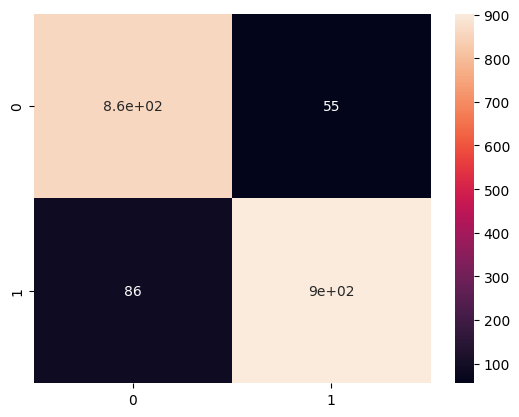

In [41]:
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(y_pred2,y_test,)
sns.heatmap(matrix, annot=True)
plt.show()


In [42]:
import pickle

# Save the model to a file
with open('clf.pkl', 'wb') as file:
  pickle.dump(clf, file)